

# Project: Investigate TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.\
1.Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.\
2.There are some odd characters in the ‘cast’ column. \
3.The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.




In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [422]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Filtering columns

In [423]:
unwanted_columns = ['original_title','id','imdb_id','cast','homepage','tagline','keywords','overview'\
                  ,'production_companies','vote_count','vote_average',\
                  'budget_adj','revenue_adj','director']
df.drop(unwanted_columns,axis = 1,inplace=True)
df.head(1)

,popularity,budget,revenue,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


### Removing missing values

In [424]:
df.isnull().sum()

popularity       0
budget           0
revenue          0
runtime          0
genres          23
release_date     0
release_year     0
dtype: int64

In [425]:
df.dropna(inplace = True)

In [426]:
df.isnull().sum().any()

False

### Removing duplicated rows

In [427]:
df.duplicated().sum()

1

In [428]:
df.drop_duplicates(inplace = True)

In [429]:
df.duplicated().sum().any()

False

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10842 non-null  float64
 1   budget        10842 non-null  int64  
 2   revenue       10842 non-null  int64  
 3   runtime       10842 non-null  int64  
 4   genres        10842 non-null  object 
 5   release_date  10842 non-null  object 
 6   release_year  10842 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 677.6+ KB


### Fixing data type

In [431]:
# Changing type of release_date from int to datetime
df['release_date']=pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10842 non-null  float64       
 1   budget        10842 non-null  int64         
 2   revenue       10842 non-null  int64         
 3   runtime       10842 non-null  int64         
 4   genres        10842 non-null  object        
 5   release_date  10842 non-null  datetime64[ns]
 6   release_year  10842 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 677.6+ KB


### Creating necessary columns

In [432]:
df['day_of_week'] = df['release_date'].dt.dayofweek
df['Month'] = df['release_date'].dt.strftime('%b')
df['profit'] = df['revenue'] - df['budget']
df

,popularity,budget,revenue,runtime,genres,release_date,release_year,day_of_week,Month,profit
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1,Jun,1363528810
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,2,May,228436354
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,2,Mar,185238201
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1,Dec,1868178225
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2015-04-01,2015,2,Apr,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,95,Documentary,2066-06-15,1966,1,Jun,0
10862,0.065543,0,0,176,Action|Adventure|Drama,2066-12-21,1966,1,Dec,0
10863,0.065141,0,0,94,Mystery|Comedy,2066-01-01,1966,4,Jan,0
10864,0.064317,0,0,80,Action|Comedy,2066-11-02,1966,1,Nov,0


### Filtering columns again

In [433]:
unwanted_col = ['revenue','release_date']
df.drop(unwanted_col,axis = 1,inplace=True)
df.head(1)

,popularity,budget,runtime,genres,release_year,day_of_week,Month,profit
0,32.985763,150000000,124,Action|Adventure|Science Fiction|Thriller,2015,1,Jun,1363528810


<a id='eda'></a>
## Exploratory Data Analysis



### For Top 100 most popularity movies of all time, What is the most popular genre?

In [434]:
df.head()

,popularity,budget,runtime,genres,release_year,day_of_week,Month,profit
0,32.985763,150000000,124,Action|Adventure|Science Fiction|Thriller,2015,1,Jun,1363528810
1,28.419936,150000000,120,Action|Adventure|Science Fiction|Thriller,2015,2,May,228436354
2,13.112507,110000000,119,Adventure|Science Fiction|Thriller,2015,2,Mar,185238201
3,11.173104,200000000,136,Action|Adventure|Science Fiction|Fantasy,2015,1,Dec,1868178225
4,9.335014,190000000,137,Action|Crime|Thriller,2015,2,Apr,1316249360


In [435]:
# Firstly, I query for each year and find what is the most popularity genres in that year
# The problem is "|" so I will deal with it.
# So, I created funtion to seperate genres
def seperate(data) :
    return data.str[0:].str.split('|',expand = True)

In [436]:
# Filter data
df_top100 = df.sort_values(by = 'popularity',ascending = False).head(100)\
[['popularity','genres','release_year']]
df_q1 = seperate(df_top100['genres'])
df_q1['popularity'] = df_top100['popularity']
df_q1

,0,1,2,3,4,popularity
0,Action,Adventure,Science Fiction,Thriller,None,32.985763
1,Action,Adventure,Science Fiction,Thriller,None,28.419936
629,Adventure,Drama,Science Fiction,None,None,24.949134
630,Action,Science Fiction,Adventure,None,None,14.311205
2,Adventure,Science Fiction,Thriller,None,None,13.112507
...,...,...,...,...,...,...
22,Action,Drama,Thriller,None,None,4.907832
7388,Adventure,Fantasy,Family,Mystery,None,4.878162
5428,Crime,Drama,Comedy,None,None,4.877927
1923,Adventure,Fantasy,Family,None,None,4.840588


In [437]:
# I created dict that key is genre and value is average of popularity value
genre_dict = {}
for i in range(len(df_q1)) :
    for genre in df_q1.iloc[i,:4] :
        if genre not in genre_dict.keys() :
            genre_dict[genre] = np.array([df_q1.iloc[i,5]])
        else :
            genre_dict[genre] = np.append(genre_dict[genre],[df_q1.iloc[i,5]])

for key in genre_dict.keys() :
    avg_pop = genre_dict[key].mean()
    update = {key : avg_pop}
    genre_dict.update(update)
genre_dict

{'Action': 7.818920929824562,
 'Adventure': 8.287519555555555,
 'Science Fiction': 8.869054049999999,
 'Thriller': 8.6935565,
 'Drama': 7.047575296296297,
 None: 7.013893630434782,
 'Fantasy': 6.563885678571428,
 'Mystery': 6.501564166666667,
 'Crime': 6.4058021999999974,
 'Western': 6.984539333333333,
 'Family': 6.021273315789474,
 'Animation': 6.79051814285714,
 'Horror': 6.7929753333333345,
 'History': 8.110711,
 'War': 6.5253784999999995,
 'Comedy': 6.067448749999997,
 'Romance': 6.136392000000001}

In [438]:
# Transforming dict to dataframe
df_q1 = pd.DataFrame.from_dict(genre_dict,orient = 'index')\
.sort_values(by = 0,ascending = False)
df_q1

,0
Science Fiction,8.869054
Thriller,8.693556
Adventure,8.287520
History,8.110711
Action,7.818921
Drama,7.047575
NaN,7.013894
Western,6.984539
Horror,6.792975
Animation,6.790518


#### Based on the bar chart below, We could see that :

1.The most popular genres is science fiction. \
2.It's has nearby popularity value with Thriller, Adventure, History and Action. \
3.It doesn't has differece too much between each genres

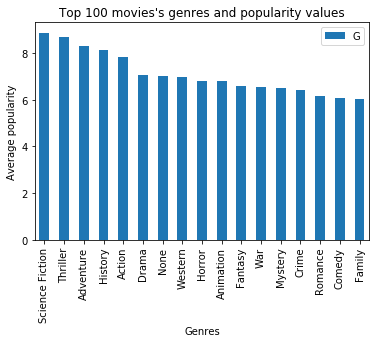

In [439]:
df_q1.plot(kind = 'bar')
plt.xlabel('Genres')
plt.ylabel('Average popularity')
plt.title("Top 100 movies's genres and popularity values")
plt.legend('Genres');

### Does runtime affect to popularity?

#### Based on the scatter plot below, We could see that :

1.runtime is affect to popularity value, the trend is more runtime will have more popularity value\
2.we will see the outliers and runtime over 200 will have popularity value like less runtime. 

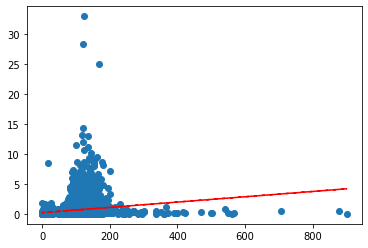

In [440]:
#Scatter plotting between runtime and popularity
x = df['runtime']
y = df['popularity']
plt.scatter(x,y)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

### Best runtime leads to the highest popularity value?

In [441]:
df['popularity'].describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

In [442]:
df['popularity'].quantile(.95)

2.049735899999997

In [443]:
# Focus on popularity value that more than 95 percentile
df_q2 = df.query('popularity >= 2.0466017499999998')
df_q2['runtime'].describe()
pop_25  = df_q2['runtime'].quantile(.25)
pop_50  = df_q2['runtime'].quantile(.5)
pop_75  = df_q2['runtime'].quantile(.75)

In [444]:
# Grouping data into 4 groups
#group 1 has runtime from minimum to 25 percentile
#group 2 has runtime from 25 percentile to 50 percentile
#group 3 has runtime from 50 percentile to 75 percentile
#group 4 has runtime from 75 percentile to maximum

group1 = df_q2.query('runtime <= {}'.format(pop_25))['popularity'].mean()
group2 = df_q2.query('runtime > {}'.format(pop_25) \
                     and 'runtime <= {}'.format(pop_50))['popularity'].mean()
group3 = df_q2.query('runtime > {}'.format(pop_50) \
                     and 'runtime <= {}'.format(pop_75))['popularity'].mean()
group4 = df_q2.query('runtime > {}'.format(pop_75))['popularity'].mean()


group1 ,group2,group3,group4

(3.277844556338029, 3.200060096774193, 3.4405727087378586, 4.596683560606059)

#### Based on the bar chart below, We could see that :

1.We can see that runtime in 130-201 mins is the best runtime for the most popularity value.\
2.There are nearby popularity value for the others runtime

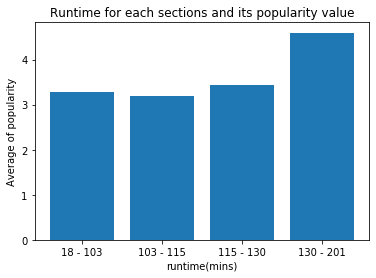

In [445]:
#Plotting graph
location = [1,2,3,4]
height = [group1,group2,group3,group4]
label = ['18 - 103','103 - 115','115 - 130','130 - 201']
plt.bar(location,height,tick_label = label)
plt.xlabel('runtime(mins)')
plt.ylabel('Average of popularity')
plt.title('Runtime for each sections and its popularity value');

### All of movies's average budgets for each years 

In [446]:
df_q4 = df.groupby('release_year')['budget'].mean()
df_q4.head()

release_year
1960    6.892796e+05
1961    1.488290e+06
1962    1.710066e+06
1963    2.156809e+06
1964    9.400753e+05
Name: budget, dtype: float64

#### Based on the line graph below, We could see that :

1.we can suggest that 1980 - 2000 is time that there are more invested in movie industry\
2.It has drop of investment in movie industry in year 2000 - 2015. My assumption is the reason of this thing is technology.

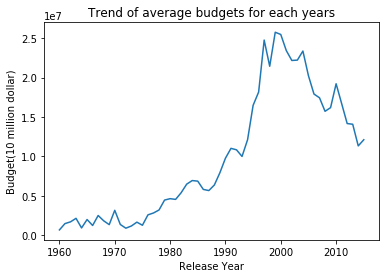

In [447]:
df_q4.plot(kind = 'line')
plt.xlabel('Release Year')
plt.ylabel('Budget(10 million dollar)')
plt.title('Trend of average budgets for each years');

### What's days of week that given maximum profits?

In [463]:
df_q5_day = df.groupby('day_of_week')['profit'].mean().sort_values()
df_q5_day.index

Int64Index([5, 6, 4, 0, 1, 3, 2], dtype='int64', name='day_of_week')

#### Based on the bar graph below, We could see that :

1.The best days of week for release movie is Sunday and the worst days is Monday\
2.We can assume that Sunday and Saturday is weekend so people are free and want find funny activity in their weekend and Monday to Wednesday are work day\
3.Interesting question is Why Thusday and Friday still have profit more than another work day?

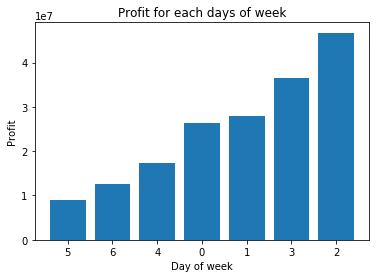

In [465]:
location = [1,2,3,4,5,6,7]
height = df_q5_day
label = df_q5_day.index
plt.bar(location,height,tick_label = label)
plt.xlabel('Day of week')
plt.ylabel('Profit')
plt.title('Profit for each days of week');

### What's months that given maximum profits?

In [450]:
df_q6 = df.groupby('Month')['profit'].mean()
df_q6

Month
Apr    1.986922e+07
Aug    1.570143e+07
Dec    3.947224e+07
Feb    1.532774e+07
Jan    7.323316e+06
Jul    3.770181e+07
Jun    5.285480e+07
Mar    2.349480e+07
May    4.262706e+07
Nov    3.752400e+07
Oct    1.422537e+07
Sep    9.997169e+06
Name: profit, dtype: float64

#### Based on the bar graph below, We could see that :

The best month for release movie is June and the worst month is January.

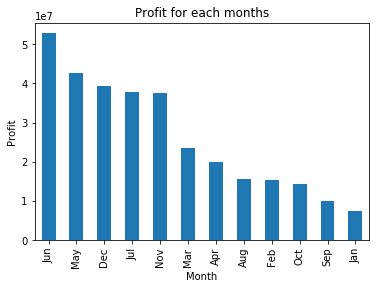

In [451]:
df_q6.sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit for each months');

## Conclusions
#### 1.The most popular genre is Science Fiction and the least popular genre is Music.
#### 2.The best runtime that leads to the hightest popularity value is 130-201 minutes.
#### 3.From year 1960 to 1980, it invested not much in movie industry but from year 1980 to 2000 we will notice that there was more invested in movie industry so this time made movie industry grew rapidly and from year 2000 to 2015, there was dropped investment.In my opinion, because of the grown technology.
#### 4.The best releasing days of week is Wednesday because it has the opportunity to make the most profit.
#### 5.The best releasing month is June because it has the opportunity to make the most profit.

<a id='conclusions'></a>
## Limitations
#### 1.By following conclusion, we can make the best decisions for make profit and popular value but it doesn't mean we will 100% make the best profit and our movie will popular, It's just have the most propability.
#### 2.There are still have another variables that we coundn't find reasons such as budget is 0, revenue is 0, Popularity value come from? and missing value so they can make our EDA have less definitiveness.

In [456]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0